In [22]:
%load_ext autoreload
%autoreload 2

import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from generate_perturbation import extract_image_attributes, fgsm_attack, pipeline, get_features
import matplotlib.pyplot as plt
from pytorchyolo.models import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
device, model = load_model('./weights/yolo_face_sthanhng.cfg', "./weights/yolo_face_sthanhng.weights")

model.eval()

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, momen

In [ ]:
def tensor_to_image(image):
    return np.transpose(image.detach().cpu().squeeze().numpy(), (1, 2, 0))

In [11]:
random_state = 100

img_path = "E:\\Documents\\GitHub\\THS-ST1\\images\\img_celeba_139\\139005.jpg"
CHOSEN_COLOR_SPACE = "LAB" #TODO: <-- pick a colorspace
CHOSEN_REGION = "bbox"  #TODO: <-- pick the region where the feature is extracted
CHOSEN_LABEL = "e_bbox_yf" #TODO: <-- pick a label
eps_model = joblib.load("model_dumps/mpr_tunedfs_LAB_bbox_e_bbox_yf.pkl")

CSV_FILENAME = "DROPPEDWITHATTRIBUTESNULL_recompiled_features_updated_yunet_pixels_bg_pixels_fixlbbox.csv" #<-- update csv name
df_features = pd.read_csv(CSV_FILENAME)
train_set, test_set = train_test_split(df_features, test_size = 0.2, random_state=random_state)

Face 0


E:\Documents\GitHub\THS-ST1\generate_perturbation.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True) #append the attributes of one face to the dataframe


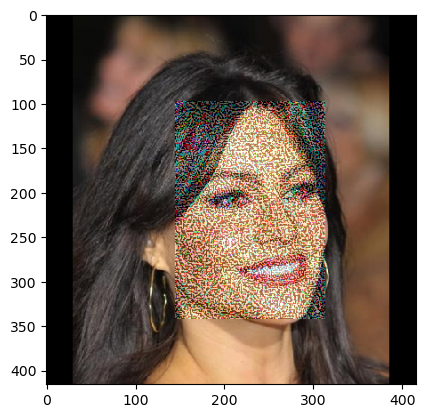

In [26]:
image = pipeline(model, device, img_path, eps_model, CHOSEN_COLOR_SPACE, CHOSEN_REGION, 1)
image = tensor_to_image(image)
plt.imshow(image)

In [ ]:
# #TODO: load model here (edit this whole cell as necessary, idk paano magproperly load from joblib)
# random_state = 100

# import joblib
# from sklearn.base import clone as clone_model

# labels = {"mask": "e_bbox_yf", "bbox": "e_face_yf"}

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# categorical_columns = df_features.select_dtypes(include=[bool, object]).columns
# encoded_columns = df_features[categorical_columns].apply(encoder.fit_transform)

# df_encoded_features = df_features.copy()
# df_encoded_features[categorical_columns] = encoded_columns

# def get_features_and_label(color_space, region):
#     features = ["w", "h", "x", "y"]
#     for color_channel in color_channels[color_space]: 
#         features += [color_channel + region + "_" + str(i) for i in range(26)]
#     features += ["LBP_BIN_" + region + "_" + str(i) for i in range(26)]
#     features += ["SOBELX_BIN_" + region + "_" + str(i) for i in range(20)]
#     features += ["SOBELY_BIN_" + region + "_" + str(i) for i in range(20)]
#     features += ["SOBEL_BIN_" + region + "_" + str(i) for i in range(20)]
#     return features, labels[region]

# from sklearn.model_selection import train_test_split
# features, _ = get_features_and_label(CHOSEN_COLOR_SPACE, CHOSEN_REGION)
# label = "e_bbox_yf"

# X_features =  df_encoded_features.loc[:,  features]
# y_features = df_encoded_features.loc[:, label].values #<-- pick label

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size = 0.2, random_state=random_state)

In [ ]:
# compare_df = X_test.copy()

In [ ]:
# compare_df['ground_truth_e_bbox_yf'] = y_test

In [ ]:
# compare_df['predicted_e_bbox_yf'] = eps_model.predict(X_test)

In [ ]:
#  compare_df.to_csv("EDA_large_error.csv", index=False)  #save to csv